#Introduction
Let’s break down and define a few key terms relating to APIs that will help us understand what happens when we access the above URL:

* **API (Application Programming Interface):** This is our waiter, a set of definitions and rules that allows different software components (like our tables and the kitchen) to communicate and interact with each other. It defines how data can be requested, accessed, and updated between different systems.

* **Endpoint:** An endpoint is a specific URL (Uniform Resource Locator) that represents **a unique resource or functionality provided by an API**. Endpoints act as access points through which we can send requests and receive responses. We can access the specific endpoint, /v4/latest/usd, to get the latest exchange rates for USD (United States Dollar) relative to other country’s currencies. We could also change this to https://api.exchangerate-api.com/v4/latest/cad to access a different endpoint and receive exchange rates for CAD (Canadian Dollar) as well. Endpoints are similar to ordering a specific dish from the menu. We could tell our waiter that we want to order the chowder, which is the equivalent of asking the ExchangeRate API (our waiter) for the USD currency exchange rates.

* **HTTP Request:** Hypertext Transfer Protocol (HTTP) is a message sent over the internet that requests for a specific action to be performed or certain information to be returned. In our above example, we are requesting information on the currency exchange rates for USD. The moment we ask our waiter for the chowder, we request a specific action taken and to have some response returned (our meal). So, you can think of an HTTP Request as the order itself. An HTTP request consists of several components:

  1. **URL (Uniform Resource Locator): **This is the URL, or endpoint, to be called to obtain the requested information or perform the requested action. Again, this is the item we are ordering.

  1. **Method:** This indicates the type of action to be performed on the resource. The two common methods are GET and POST.

    * GET: This is like asking for information. The request asks to retrieve or fetch data from the endpoint. An example would be asking for a menu item and receiving the dish back to eat.

    * POST: This is like submitting a form or sending data. The request includes data that needs to be processed or stored by the recipient. An example would be giving the chef a special recipe to prepare, where you need to supply additional information for your request to be fulfilled.

  1. **Headers:** These provide additional information about the request, such as the type of data sent (for example, string or JSON data) or authentication credentials. An example would be providing extra information about how you want your meal, like that it should be gluten-free.

  1. **Body:** In the case of a POST request, the body contains the data that needs to be sent to the recipient. Depending on the requirements, it can include form data, JSON, or other formats. In the example where you provide the chef with your special recipe to cook, the body would contain all the ingredients needed to make the recipe.


#Request Library

In order to interact with APIs, we need to know how to make HTTP requests. An HTTP request is a message sent by a client (such as a web browser or a Python script) to a server, or the recipient. The server then sends back an HTTP response containing the requested data.

We can also make HTTP request API calls through our Python code using a library module called `requests`. This module provides an easy way to send HTTP requests, handle responses, and manage various aspects of the request process.

As with other modules, we start using it by importing it. We can then call the `get()` command to get the response data containing the exchange rates.

In [1]:
import requests

endpoint = 'https://api.exchangerate-api.com/v4/latest/usd'

# Make a GET request to the API endpoint
response = requests.get(endpoint)
print(type(response))
print(response)

<class 'requests.models.Response'>
<Response [200]>


we can see that calling `get()` with our endpoint returns a value representing the HTTP response. As you can see, the type of the response is requests.models.Response.

Printing the response, we see a `200` that follows Response, which represents the status code of the request. We will learn more about status codes later on, but for now, know that the status code 200 means that the request was able to return a response successfully

# Converting the HTTP Response to JSON

To turn this JSON response into a Python dictionary, we can call `json()` on our response variable. This parses the response into JSON and then returns it as a Python dictionary that we can then access using key/value pairs:

In [2]:
import requests

endpoint = 'https://api.exchangerate-api.com/v4/latest/usd'

# Make a GET request to the API endpoint
response = requests.get(endpoint)
print(type(response))

#response with JSON information
response_json = response.json()


print(response_json)
print(type(response_json))

<class 'requests.models.Response'>
{'provider': 'https://www.exchangerate-api.com', 'WARNING_UPGRADE_TO_V6': 'https://www.exchangerate-api.com/docs/free', 'terms': 'https://www.exchangerate-api.com/terms', 'base': 'USD', 'date': '2025-03-11', 'time_last_updated': 1741651202, 'rates': {'USD': 1, 'AED': 3.67, 'AFN': 72.29, 'ALL': 91.52, 'AMD': 394.47, 'ANG': 1.79, 'AOA': 919.63, 'ARS': 1066.33, 'AUD': 1.59, 'AWG': 1.79, 'AZN': 1.7, 'BAM': 1.8, 'BBD': 2, 'BDT': 121.5, 'BGN': 1.8, 'BHD': 0.376, 'BIF': 2962.97, 'BMD': 1, 'BND': 1.33, 'BOB': 6.92, 'BRL': 5.79, 'BSD': 1, 'BTN': 87.37, 'BWP': 13.71, 'BYN': 3.25, 'BZD': 2, 'CAD': 1.44, 'CDF': 2862.53, 'CHF': 0.879, 'CLP': 929.87, 'CNY': 7.26, 'COP': 4149.76, 'CRC': 504.85, 'CUP': 24, 'CVE': 101.72, 'CZK': 23.05, 'DJF': 177.72, 'DKK': 6.88, 'DOP': 62.29, 'DZD': 133.41, 'EGP': 50.6, 'ERN': 15, 'ETB': 128.84, 'EUR': 0.923, 'FJD': 2.3, 'FKP': 0.776, 'FOK': 6.88, 'GBP': 0.776, 'GEL': 2.78, 'GGP': 0.776, 'GHS': 15.59, 'GIP': 0.776, 'GMD': 72.59, 'GNF

When we print the contents of `response_json`, we can see that our dictionary now resembles the result we saw in our browser. We can print the type of response_json and see that it is now a dictionary instead of a response. Our dictionary has several different key and value mappings. Let's discuss what some of these keys and values are:

* `rates`: a dictionary that maps country codes to their exchange rates. When we want to get an exchange rate for a specific country, we should use this key and value to retrieve the value.

* `provider`: the main URL for the API, without any added-on endpoint.

* `terms`: links to the terms and conditions for using the API.

* `base`: the base currency, or our original currency, that we requested exchange rates for in our initial endpoint (i.e., https://api.exchangerate-api.com/v4/latest/usd).

* date: the date we made the HTTP request.

* `time_last_updated`: the timestamp when the currency exchange rates were last updated. It is a Unix timestamp, which is the number of seconds that have elapsed since January 1, 1970 (also known as the Unix epoch).

* `WARNING_UPGRADE_TO_V6`: this key is simply a warning to switch to using the latest version (V6) of the API provider URL. We are using version V4 in our examples throughout this lesson since V4 is completely free and open to use, whereas V6 requires account creation. You are more than welcome to experiment with using V6 by following the ExchangeRate-API documentation listed here.

In [3]:
import requests

endpoint_url = 'https://api.exchangerate-api.com/v4/latest/gbp'

# Make a GET request to the API endpoint
response = requests.get(endpoint_url)
print(type(response))

#response with JSON information
response_dict = response.json()


print(response_dict)
print(type(response_dict))

#print each value of the dict
for key in response_dict:
    print(key)
    print(response_dict[key])

<class 'requests.models.Response'>
{'provider': 'https://www.exchangerate-api.com', 'WARNING_UPGRADE_TO_V6': 'https://www.exchangerate-api.com/docs/free', 'terms': 'https://www.exchangerate-api.com/terms', 'base': 'GBP', 'date': '2025-03-11', 'time_last_updated': 1741651202, 'rates': {'GBP': 1, 'AED': 4.73, 'AFN': 93.4, 'ALL': 118.24, 'AMD': 509.78, 'ANG': 2.31, 'AOA': 1205.52, 'ARS': 1374.76, 'AUD': 2.05, 'AWG': 2.31, 'AZN': 2.2, 'BAM': 2.33, 'BBD': 2.58, 'BDT': 156.67, 'BGN': 2.33, 'BHD': 0.485, 'BIF': 3826.63, 'BMD': 1.29, 'BND': 1.72, 'BOB': 8.95, 'BRL': 7.49, 'BSD': 1.29, 'BTN': 112.67, 'BWP': 17.74, 'BYN': 4.2, 'BZD': 2.58, 'CAD': 1.86, 'CDF': 3719.35, 'CHF': 1.13, 'CLP': 1201.16, 'CNY': 9.37, 'COP': 5363.24, 'CRC': 652.55, 'CUP': 30.94, 'CVE': 131.14, 'CZK': 29.73, 'DJF': 229.13, 'DKK': 8.87, 'DOP': 80.5, 'DZD': 172.4, 'EGP': 65.4, 'ERN': 19.34, 'ETB': 168.84, 'EUR': 1.19, 'FJD': 2.96, 'FKP': 1, 'FOK': 8.87, 'GEL': 3.59, 'GGP': 1, 'GHS': 20.15, 'GIP': 1, 'GMD': 93.8, 'GNF': 1112

#Get method

The **GET method** is an HTTP method used for retrieving data from a server. It is widely used in programming, particularly with APIs. It is a safe method to use because it does not modify or have any side effects on the server's data like the POST method does.

The primary purpose of the GET method is to **retrieve information and resources**. It can retrieve data in various formats but typically in HTML (Hypertext Markup Language), XML, and JSON.

Let's review how to use the GET method:

In [4]:
import requests

endpoint = 'https://api.exchangerate-api.com/v4/latest/usd'

# Make a GET request to the API endpoint
response = requests.get(endpoint)

The response can be accessed similarly as we did with the POST method by converting to a dictionary and accessing any of the keys present in the dictionary. In this example, if we print the response dictionary, we can access `response['rates']` to get the whole dictionary of country codes and their exchange rates.

In [5]:
import requests

endpoint = 'https://api.exchangerate-api.com/v4/latest/usd'

# Make a GET request to the API endpoint
response = requests.get(endpoint)
response_dict = response.json()

print(response_dict['rates'])

{'USD': 1, 'AED': 3.67, 'AFN': 72.29, 'ALL': 91.52, 'AMD': 394.47, 'ANG': 1.79, 'AOA': 919.63, 'ARS': 1066.33, 'AUD': 1.59, 'AWG': 1.79, 'AZN': 1.7, 'BAM': 1.8, 'BBD': 2, 'BDT': 121.5, 'BGN': 1.8, 'BHD': 0.376, 'BIF': 2962.97, 'BMD': 1, 'BND': 1.33, 'BOB': 6.92, 'BRL': 5.79, 'BSD': 1, 'BTN': 87.37, 'BWP': 13.71, 'BYN': 3.25, 'BZD': 2, 'CAD': 1.44, 'CDF': 2862.53, 'CHF': 0.879, 'CLP': 929.87, 'CNY': 7.26, 'COP': 4149.76, 'CRC': 504.85, 'CUP': 24, 'CVE': 101.72, 'CZK': 23.05, 'DJF': 177.72, 'DKK': 6.88, 'DOP': 62.29, 'DZD': 133.41, 'EGP': 50.6, 'ERN': 15, 'ETB': 128.84, 'EUR': 0.923, 'FJD': 2.3, 'FKP': 0.776, 'FOK': 6.88, 'GBP': 0.776, 'GEL': 2.78, 'GGP': 0.776, 'GHS': 15.59, 'GIP': 0.776, 'GMD': 72.59, 'GNF': 8610.47, 'GTQ': 7.72, 'GYD': 209.34, 'HKD': 7.77, 'HNL': 25.59, 'HRK': 6.95, 'HTG': 131.18, 'HUF': 368.64, 'IDR': 16377.88, 'ILS': 3.64, 'IMP': 0.776, 'INR': 87.37, 'IQD': 1311.24, 'IRR': 42009.15, 'ISK': 135.41, 'JEP': 0.776, 'JMD': 156.97, 'JOD': 0.709, 'JPY': 147.07, 'KES': 129.

##Query parameters

GET requests can include **query parameters** as part of the URL. These parameters provide additional information to the server to refine the request or filter the response data. Query parameters are appended to the URL using the `?` symbol, followed by key-value pairs separated by `&`

    import requests

    url = 'https://api.exchangerate-api.com/v4'

    # Specify the parameters for the GET request
    param1 = 'usd'
    param2 = 'cad'

    # Construct the URL with parameters
    full_url = url + '?param1=' + param1 + '&param2=' + param2

    response = requests.get(full_url)

The server side can then, for example, take these provided parameters to filter returned results or to perform a conversion from `USD` to `CAD`.

In [6]:
import requests

currencies = ['EGP', 'GMD', 'CLP']
base_url = "https://api.exchangerate-api.com/v4/latest/"

for currency_code in currencies:

    #concatenate url + currency_code
    url = base_url+currency_code

    #get info from url
    response = requests.get(url)

    #convert to json
    response = response.json()

    #print enchange rates from USD to EGP, GMD, CLP
    print(response['rates']['USD'])

0.0198
0.0138
0.00108


#Post Method

**The POST method** is one of the HTTP methods used in applications to send data to a server, or the recipient of our HTTP request. It is commonly used to create or update resources on the server. For example, when you create a new account on a website, the information you submit is sent to the server using a POST request.

    # Define the API endpoint URL where the account creation information will be submitted
    endpoint = "https://example.com/api/create-account"

    # Prepare the account creation data as a dictionary
    account_data = {
        "username": "example_user",
        "email": "example@example.com",
        "password": "example_password"
    }

    # Make the POST request to submit the account creation data
    response = requests.post(endpoint, json=account_data)

This method submits data and requests the server to act based on that data. On the server side, it can parse all of the data from `account_data` sent in the request and take an action like storing your new account information in a database.

The POST method can send data to the server within the **request body.** The body can contain different data types, such as JSON, XML (Extensible Markup Language), form data, or plain text, depending on the content type specified when submitting the request. After the URL endpoint is specified, the body is passed into the `post()` call. It is set to the parameter called `data` if our data is in string format or to the parameter called json if the data is a dictionary.

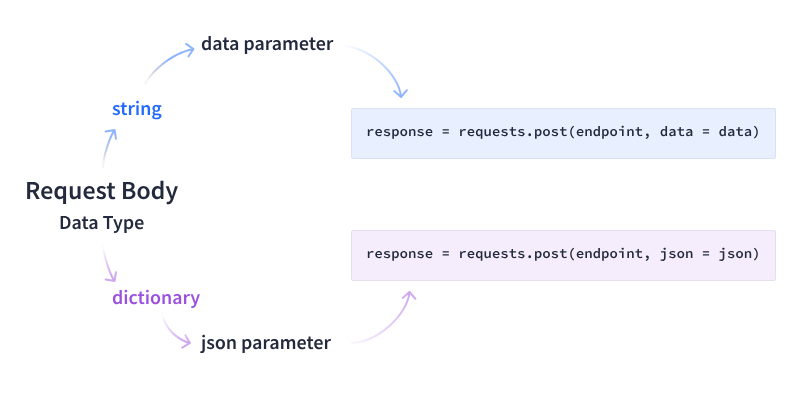

The following code example is also not a live-working endpoint but simply demonstrates how to construct a POST call. We cannot make any POST calls using the free and open ExchangeRate-API endpoints. API providers offering open access endpoints will typically have restricted access to their POST methods for security reasons. Allowing unrestricted POST requests from any unregistered user could lead to unauthorized modification of the server's data, posing a **security risk.**

    import requests
    ​
    url = 'https://api.exchangerate-api.com/v4/convert'
    ​
    # Specify the parameters for the POST request
    payload = {
        'from': 'USD',         # Convert from USD
        'to': 'EUR',           # Convert to EUR
        'amount': 100          # Specify the amount to convert
    }
    ​
    response = requests.post(url, json=payload)
    ​
    data = response.json()

In the above code, there is a parameter, or a value being passed to the endpoint, called json that is set to the payload we want to send to the server. We used the `json` parameter since our payload variable is a dictionary.

We can unbundle the response by first converting the response to a dictionary using `json()` and then accessing the key result in the dictionary to get the final converted amount:

    response = requests.post(url, json=payload)

    data = response.json()
    converted_amount = data['result']
    print(converted_amount)

#Converting JSON Data to Strings

On the previous screen, we set the json attribute in the `requests.post()` call to send our payload dictionary data.

We could have instead used the data attribute by converting our payload dictionary into a string first. The json module that we have previously introduced has a command called `dumps()` that lets us do just this:

    import json
    import requests

    url = 'https://api.exchangerate-api.com/v4/convert'

    # Specify the parameters for the POST request
    payload = {
        'from': 'USD',         # Convert from USD
        'to': 'EUR',           # Convert to EUR
        'amount': 100          # Specify the amount to convert
    }

    payload_str = json.dumps(payload)
    print(payload_str)
    print(type(payload_str))
    response = requests.post(url, data=payload_str)

The `json.dumps() `command takes our payload dictionary and returns a string representation of that dictionary in JSON format. When we print the type that is returned after calling `json.dumps()`, we get back a str type. Once our payload is converted to a string, it can then be passed into the `data` attribute in the `requests.post()` call.

Using `json.dumps() `is particularly useful when an API specifically requires JSON-formatted string data in the request body.

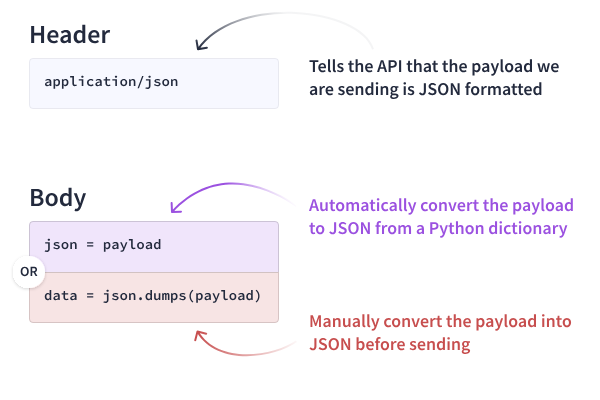

1. You can use the data attribute when:

  * The API expects the request payload to be in a format other than JSON, like form data encoded in a string format.
  * When sending a string or bytes-like object as the payload.
  * Example data: Form data or file uploads.
  You can use the json attribute when:

1. The API expects the request payload to be in JSON format.
  * You want to automatically serialize a Python object (like a dictionary or list) into JSON format.
  * Example data: Sending a Python dictionary to an API that accepts JSON payloads.

In [8]:
import json

exchange_rate_map = {
    'EUR': 0.927,
    'USD': 1,
    'CAD': 1.33,
    'JPY': 139.9,
    'GBP': 0.794
}

exchange_rate_map_str = json.dumps(exchange_rate_map)
print(type(exchange_rate_map))
print(exchange_rate_map_str)
print(type(exchange_rate_map_str))

<class 'dict'>
{"EUR": 0.927, "USD": 1, "CAD": 1.33, "JPY": 139.9, "GBP": 0.794}
<class 'str'>


# Formating Strings

In Python, there's a powerful tool called `f-strings` (also known as "formatted string literals") that allows us to embed expressions inside string literals, using curly braces {}. This makes it easier to construct and manipulate strings.

The syntax of an `f-string `is straightforward: prefix the string with a lowercase f or an uppercase F before the opening quotation mark. Within the string, any expressions placed within curly braces `{} `are evaluated and replaced with their results.

Let's say we want to convert from one specific currency to another and we want to make these currencies dynamic. We can use f-strings to construct our API URL endpoint.

In [9]:
base_currency = 'USD'

url = f'https://api.exchangerate-api.com/v4/latest/{base_currency}'
print(url)

https://api.exchangerate-api.com/v4/latest/USD


F-strings can also be used when constructing the payload for a POST request. For example:

In [10]:
base_currency = 'USD'
target_currency = 'EUR'
amount_to_convert = 100

payload = f'{{"from": "{base_currency}", "to": "{target_currency}", "amount": {amount_to_convert}}}'
print(payload)

{"from": "USD", "to": "EUR", "amount": 100}


This code creates a JSON-formatted string that includes variable content, using f-string formatting. It's important to use double curly braces {{}} when you want to include a literal brace character in the formatted string.

Please remember that although f-strings can be very useful for string formatting, the `json.dumps(`) function is often a better choice when working with more complex data structures because it automatically handles special characters and escape sequences.

In [11]:
import requests

currencies = ['EGP', 'GMD', 'CLP']
base_url = "https://api.exchangerate-api.com/v4/latest/"

for currency_code in currencies:
    url = f"{base_url}{currency_code}"
    response = requests.get(url)
    response = response.json()
    print(f"The exchange rate from {currency_code} to USD is {response['rates']['USD']}.")

The exchange rate from EGP to USD is 0.0198.
The exchange rate from GMD to USD is 0.0138.
The exchange rate from CLP to USD is 0.00108.


#HTTP Request Error Handling

We were previously able to make successful HTTP requests because we retrieved valid and expected HTTP responses that represented all of our currency exchange rates. There are times, however, when we do not receive a successful response from the server. Checking for these errors is important because it allows us to gracefully handle the error so that the users of our application can be informed of what went wrong in a way that they understand.

When we initiate an HTTP request, we get back an HTTP response. This response contains an attribute, or a specific piece of information or property associated with the response, called `status_code` that indicates the outcome of the request. Here are a few example status codes:

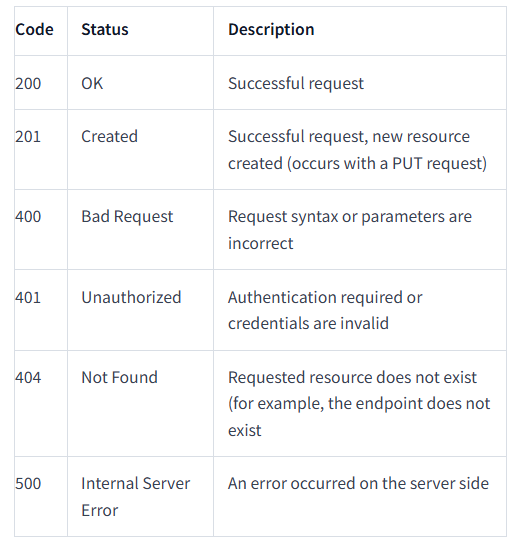


We can access the response status code by running the following lines of code:

In [12]:
import requests

endpoint = 'https://api.exchangerate-api.com/v4/latest/usd'

# Make a GET request to the API endpoint
response = requests.get(endpoint)
print(response.status_code)

200


We can use if/elif/else statements to check the response and print appropriate messages for each.


In [15]:
import requests

endpoint = 'https://api.exchangerate-api.com/v4/latest/usd'

# Make a GET request to the API endpoint
response = requests.get(endpoint)
if response.status_code == 200:
    print("Request was successful!")
elif response.status_code == 404:
    print("Endpoint not found. Please check the currency code provided in the endpoint.")
else:
    print("Something went wrong.")

Request was successful!


Instructions

Your task is to generate URLs dynamically using currency_codes. `make requests.get()` calls to each, and print relevant messages based on the status code returned.

Here's the behavior we want based on the status code:

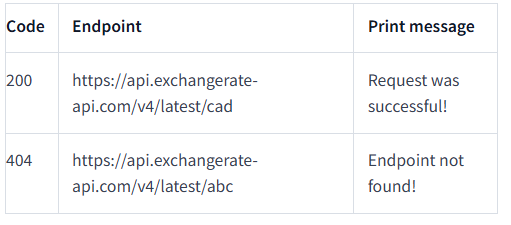

In [16]:
import requests

currency_codes = ['cad', 'abc']
base_url = "https://api.exchangerate-api.com/v4/latest/"

for currency_code in currency_codes:
    url = f"{base_url}{currency_code}"
    print(url)
    response = requests.get(url)
    if response.status_code == 200:
        print("Request was successful!")
    elif response.status_code == 404:
        print(f"Endpoint not found!")

https://api.exchangerate-api.com/v4/latest/cad
Request was successful!
https://api.exchangerate-api.com/v4/latest/abc
Endpoint not found!
